In [1]:
import imutils
import cv2
from IPython import display
from PIL import Image

In [2]:
img = cv2.imread("blob/images/jp.png")
h,w,d = img.shape

In [3]:
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=322, depth=3


In [6]:
def cv2_imshow(a):
    """A replacement for cv2.imshow() for use in inline Jupyter notebooks.
    Args:
    a : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
      (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
      image.
    """
    a = a.clip(0, 255).astype('uint8')
    
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(Image.fromarray(a))

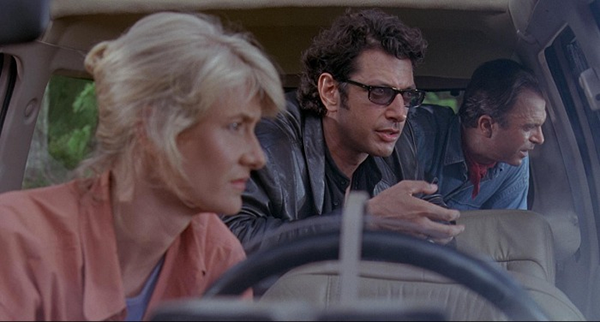

In [7]:
cv2_imshow(img)

In [18]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB

b,g,r = img[100,50]
print("R={}, G={}, B={}".format(r, g, b))

R=41, G=49, B=37


### Region of interest

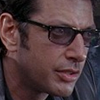

In [19]:
region_of_interest = img[60:160, 320:420]
cv2_imshow(region_of_interest)

### Resizing Image

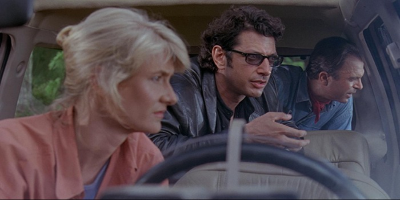

Width  : 400
Height : 200


In [36]:
resized_img = cv2.resize(img, (400,200))
cv2_imshow(resized_img)
h,w,d = resized_img.shape
print(f"Width  : {w}\nHeight : {h}")

### Resize Maintaining aspect ratio

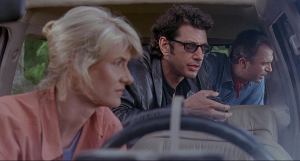

In [31]:
resized_img = imutils.resize(img, width=300) # This makes image 300px wide maintaining original aspect ratio
cv2_imshow(resized_img)

### Rotated Image

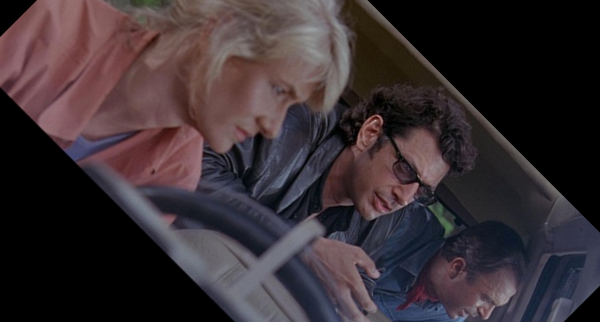

As you can see image is clipped after rotation


In [46]:
clipped_rotated_img = imutils.rotate(img, -45) #45 degrees clockwise
cv2_imshow(clipped_rotated_img)
print("As you can see image is clipped after rotation")

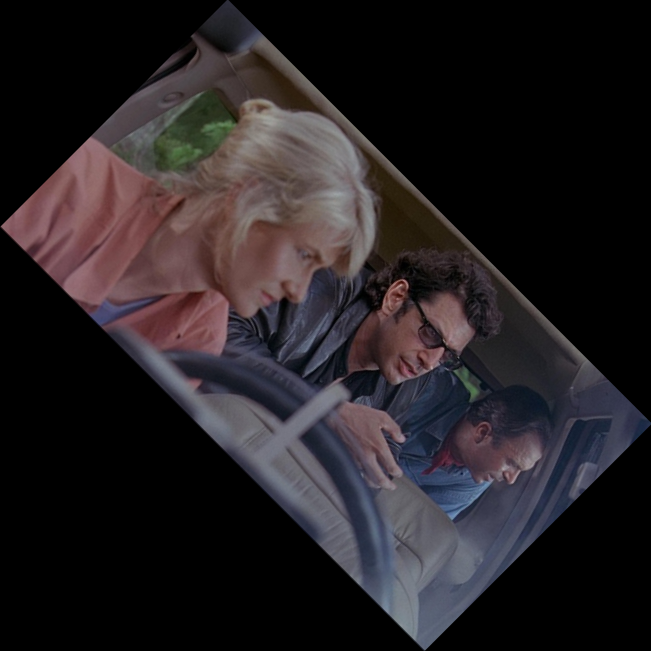

In [48]:
bound_rotated_img = imutils.rotate_bound(img, 45)
cv2_imshow(bound_rotated_img)

### Blur image

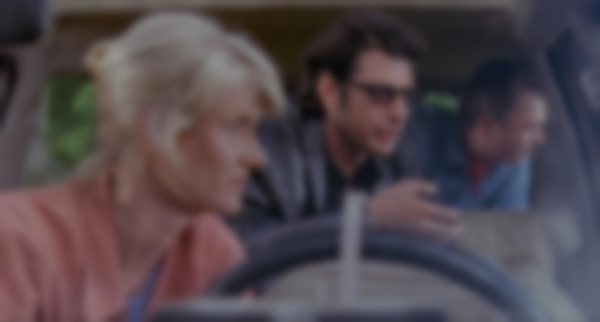

In [94]:
# apply a Gaussian blur with a odd sized kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred_img = cv2.GaussianBlur(img, (21,21),4) 
cv2_imshow(blurred_img)

### Drawing on an image

Drawing operations are performed in-place. So we first make copy of image and work on copied object

#### Rectangle

(322, 600, 3)


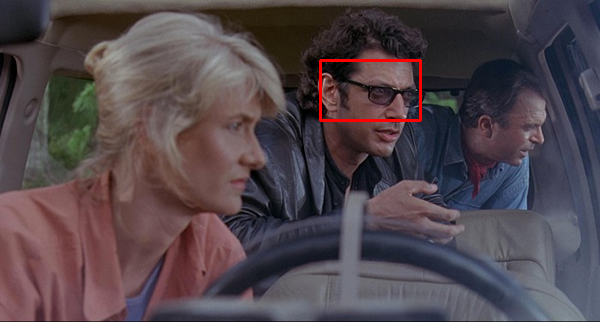

In [82]:
output = img.copy()
print(output.shape)
top_left_pos = (320,60)
bottom_right_pos = (420,120)
border_color = (0,0, 255)
border_thickness = 2
cv2.rectangle(output, top_left_pos, bottom_right_pos, border_color, border_thickness)
cv2_imshow(output)

#### Circle

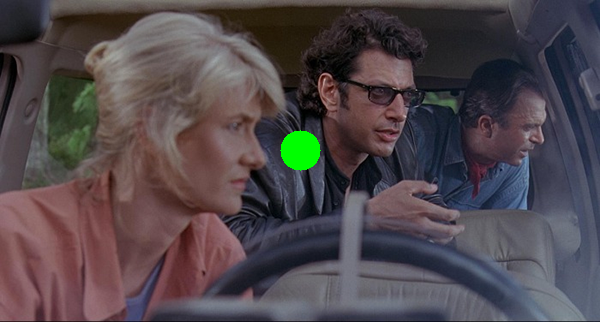

In [88]:
output = img.copy()
cv2.circle(output, center = (300,150), radius = 20, color=(0,255,0),thickness =  -1) # -1 for solid fill
cv2_imshow(output)

#### Insert some text

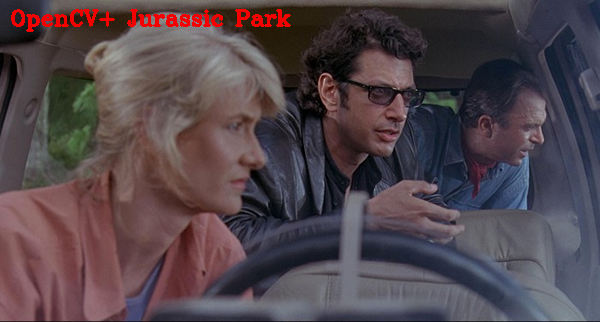

In [90]:
output = img.copy()
pos = (10,25)
font_multiplier = 0.7
color = (0,0,244)
thickness = 2

cv2.putText(output, "OpenCV+ Jurassic Park", pos, cv2.FONT_HERSHEY_COMPLEX, font_multiplier, color, thickness)
cv2_imshow(output)

### Convert the image to grayscale

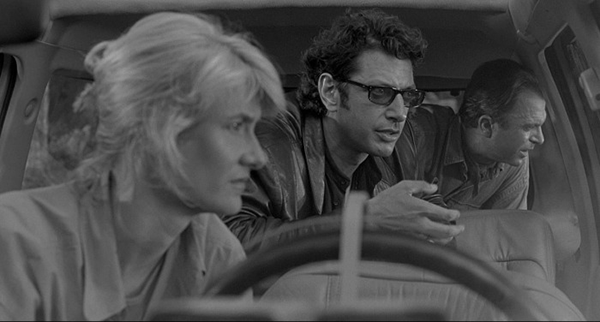

In [95]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#### Load tetris image

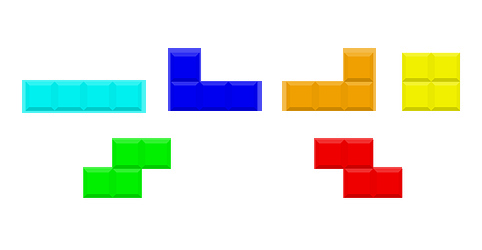

In [96]:
tetris_img = cv2.imread("blob/images/tetris_blocks.png")
cv2_imshow(tetris_img)

### Edge Detection

In [ ]:
edged = cv2.Canny(gray, )